In [10]:
import pandas as pd
import numpy as np
import sys, os
from matplotlib import pyplot as plt
import seaborn as sns

# local imports
sys.path.append(os.path.join(os.path.pardir))
from evaluate import Evaluator

In [142]:
BIAS = [0, 1, 2, 4, 8, 16]
STD =  [0, 1, 2, 4, 8, 16]
N_SAMPLE = 100000

In [143]:
evaluator = Evaluator("regression")
y = np.random.normal(0, 1, N_SAMPLE)
y_dict = dict()
for b in BIAS:
    for s in STD:
        name = f'bias_{b}-std_{s}'
        y_dict[name] = y + np.random.normal(b, s, N_SAMPLE) 
        evaluator.log(y, y_dict[name])
df = pd.DataFrame(y_dict)
df['y'] = y
df

,bias_0-std_0,bias_0-std_1,bias_0-std_2,bias_0-std_4,bias_0-std_8,bias_0-std_16,bias_1-std_0,bias_1-std_1,bias_1-std_2,bias_1-std_4,...,bias_8-std_4,bias_8-std_8,bias_8-std_16,bias_16-std_0,bias_16-std_1,bias_16-std_2,bias_16-std_4,bias_16-std_8,bias_16-std_16,y
0,-0.620961,1.825647,-3.151950,2.201658,6.544004,-16.805038,0.379039,1.628220,0.797569,4.202075,...,7.209567,12.734557,27.246678,15.379039,15.300739,19.592600,5.003088,22.055101,37.595898,-0.620961
1,-0.820041,-0.144431,-2.283982,-5.600017,-0.245848,11.266546,0.179959,-0.071759,1.679613,0.086481,...,12.296767,11.476707,3.289355,15.179959,14.819766,14.469225,19.684072,14.226538,-23.031162,-0.820041
2,-0.565635,0.558022,1.538329,-1.887012,-7.996442,9.787328,0.434365,1.977192,-0.984412,2.654258,...,14.793919,7.301706,30.705945,15.434365,16.072269,16.762076,15.072057,-1.663730,5.061143,-0.565635
3,-1.225080,-0.432783,0.135738,-4.446977,-5.749004,0.626877,-0.225080,-0.303449,1.131635,0.424015,...,9.084042,10.334757,0.475938,14.774920,13.666508,15.539635,10.272528,8.605563,7.488626,-1.225080
4,-1.465747,-0.954646,-3.314703,-0.872052,-0.770485,-2.549012,-0.465747,-0.774245,0.702869,-5.365725,...,8.545076,2.677663,0.271252,14.534253,16.241544,14.722702,5.194520,25.429279,17.630554,-1.465747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.034739,-0.579661,-0.291884,-2.740005,-0.858757,-24.217205,1.034739,1.816216,-0.415610,1.083616,...,13.065542,-1.549783,-6.650293,16.034739,16.856547,14.979073,20.183953,8.019632,22.244265,0.034739
99996,-0.877158,1.136403,-1.434063,1.176480,-17.662348,33.372176,0.122842,1.167174,-2.864725,7.481947,...,-1.420210,7.453477,12.652650,15.122842,16.312073,13.736286,22.451690,8.670887,-10.239817,-0.877158
99997,0.802720,2.960206,0.488943,2.372166,-1.018945,17.907004,1.802720,0.192331,0.076515,1.353378,...,9.340051,15.520168,12.302539,16.802720,16.736346,14.731313,20.310840,13.428251,26.446767,0.802720
99998,0.282247,0.543338,-0.258037,1.004711,-5.360100,-16.652982,1.282247,2.152550,2.187647,0.073725,...,5.128318,14.553929,6.251506,16.282247,16.451244,16.238104,19.211741,26.549345,-2.905279,0.282247


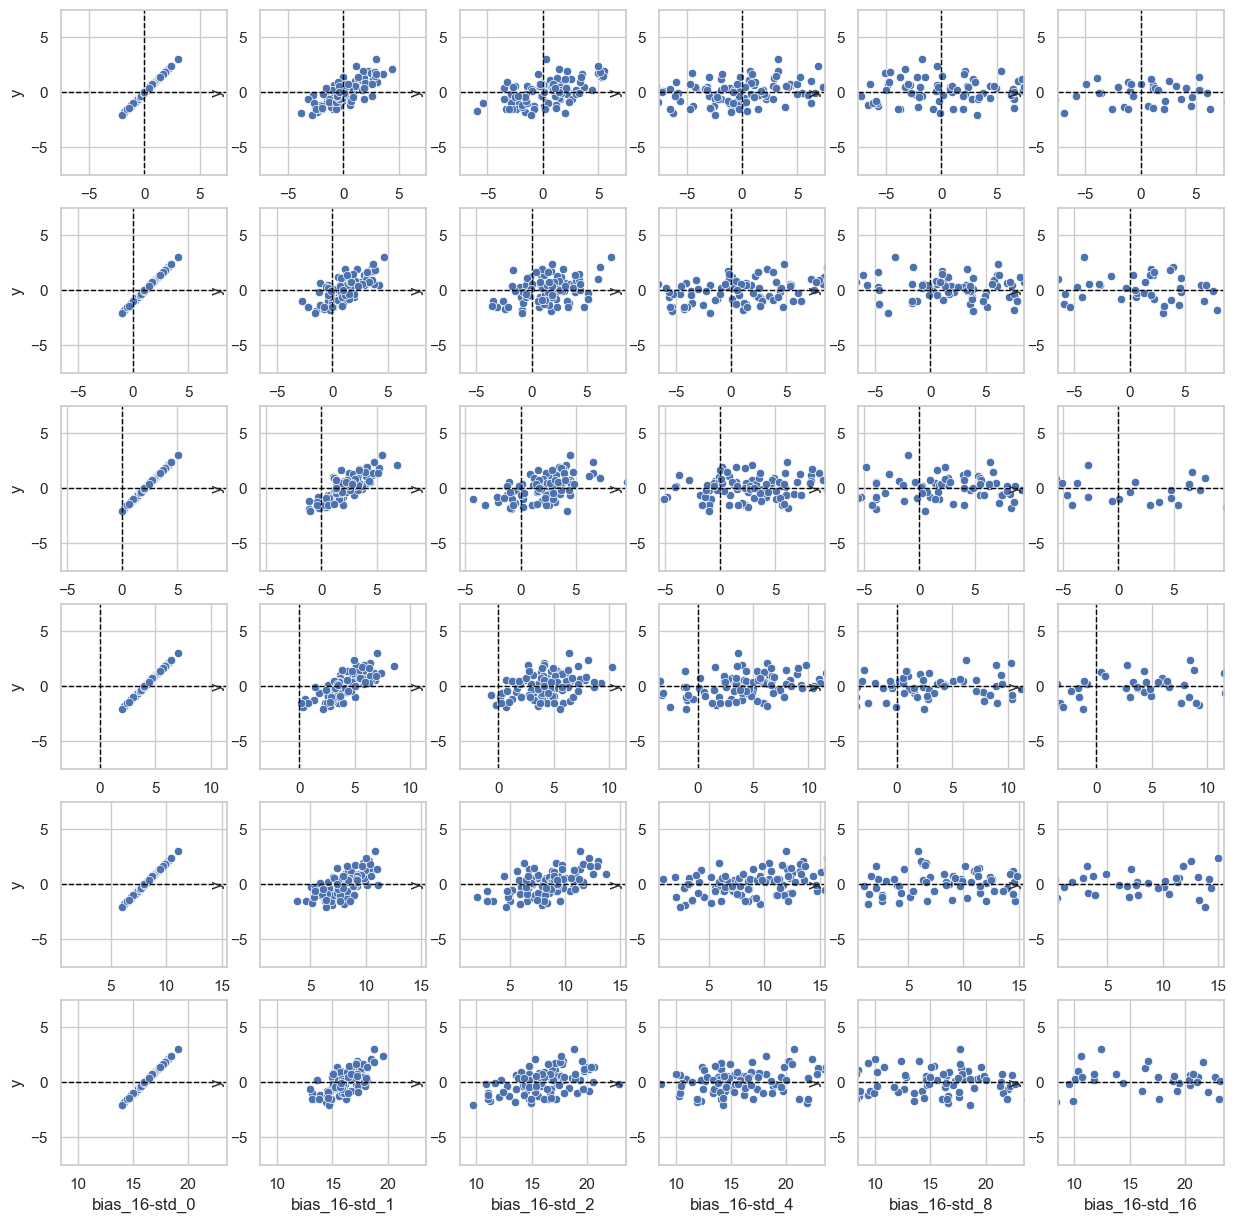

In [144]:
# 3 by 3 subplots
lim = 7.5
sns.set(style="whitegrid")
n_subplots = len(BIAS)
fig, axes = plt.subplots(n_subplots, n_subplots, figsize=(15, 15))
for i, b in enumerate(BIAS):
    for j, s in enumerate(STD):
        name = f'bias_{b}-std_{s}'
        # set range
        axes[i, j].set_xlim(-lim + BIAS[i], lim + BIAS[i])
        axes[i, j].set_ylim(-lim, lim)
        # draw vertical and horizontal lines at 0
        axes[i, j].axvline(0, color='black', linewidth=1, linestyle='--')
        axes[i, j].axhline(0, color='black', linewidth=1, linestyle='--')
        # scatter plots
        sns.scatterplot(x=name, y="y", data=df.iloc[:100, :], ax=axes[i, j])
        
        

In [145]:
df_evl = evaluator.to_dataframe()
df_evl["trt"] = y_dict.keys()
# split bias_0-std_0 to bias_0 and std_0
df_evl["bias"] = df_evl["trt"].apply(lambda x: x.split("-")[0].split("_")[1])
df_evl["std"] = df_evl["trt"].apply(lambda x: x.split("-")[1].split("_")[1])
df_evl


,iteration,R2,r,r2,CCC,MAE,RMSE,RMSPE,RSR,trt,bias,std
0,0,1.000000,1.000010,1.000020,1.000010,0.000000,0.000000,0.000000,0.000000,bias_0-std_0,0,0
1,1,-0.005569,0.704554,0.496397,0.664444,0.799230,1.001145,8893.823625,1.002781,bias_0-std_1,0,1
2,2,-3.030593,0.444280,0.197385,0.330667,1.599192,2.004358,46116.148354,2.007634,bias_0-std_2,0,2
3,3,-15.014479,0.245415,0.060228,0.112309,3.185618,3.995280,17313.375501,4.001809,bias_0-std_4,0,4
4,4,-62.621386,0.124494,0.015499,0.030501,6.356106,7.963287,17195.727415,7.976302,bias_0-std_8,0,8
5,5,-256.467416,0.064474,0.004157,0.007988,12.772354,16.019611,148929.431919,16.045791,bias_0-std_16,0,16
6,6,-0.003271,1.000010,1.000020,0.665947,1.000000,1.000000,8411.254417,1.001634,bias_1-std_0,1,0
7,7,-1.003694,0.706529,0.499184,0.499005,1.166352,1.413210,542.886016,1.415519,bias_1-std_1,1,1
8,8,-4.021102,0.438505,0.192287,0.280289,1.791247,2.237125,3865.395951,2.240781,bias_1-std_2,1,2
9,9,-15.880218,0.239704,0.057458,0.104452,3.277615,4.101851,26449.205433,4.108554,bias_1-std_4,1,4


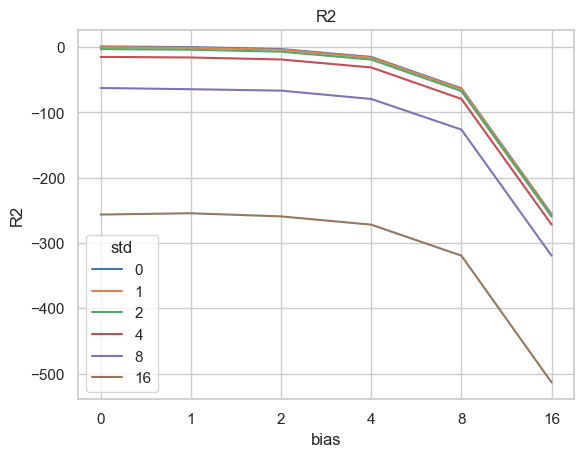

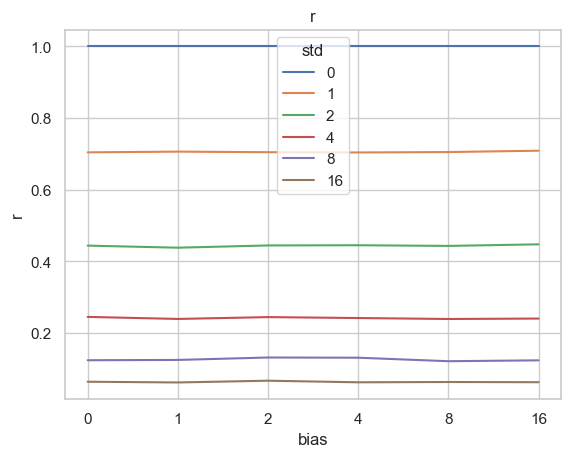

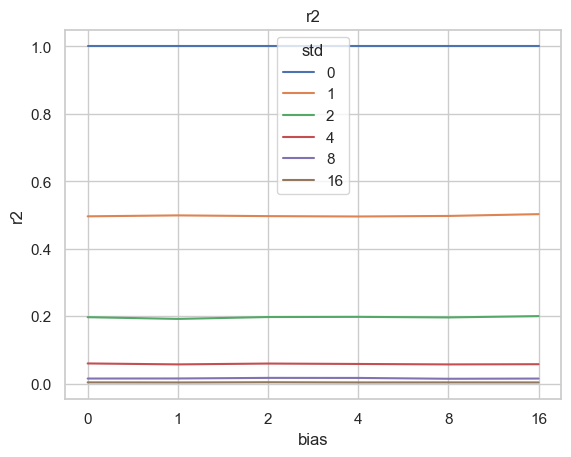

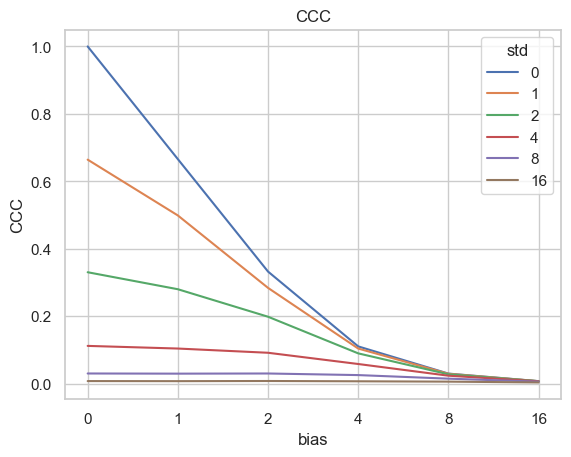

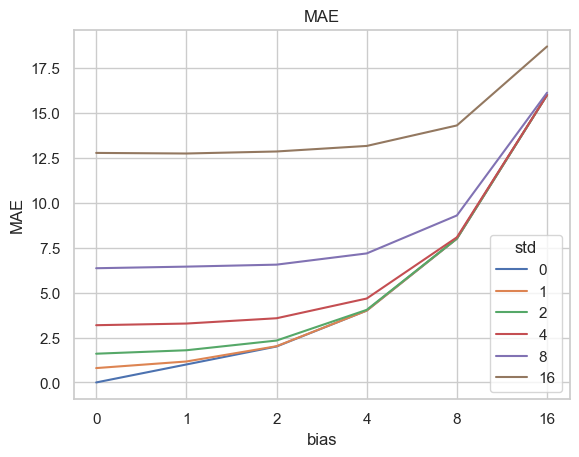

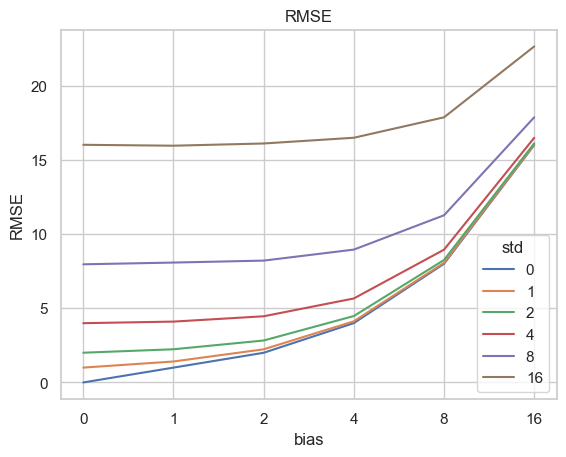

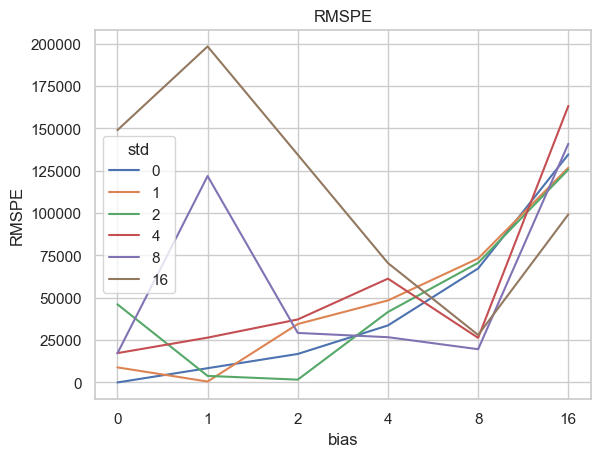

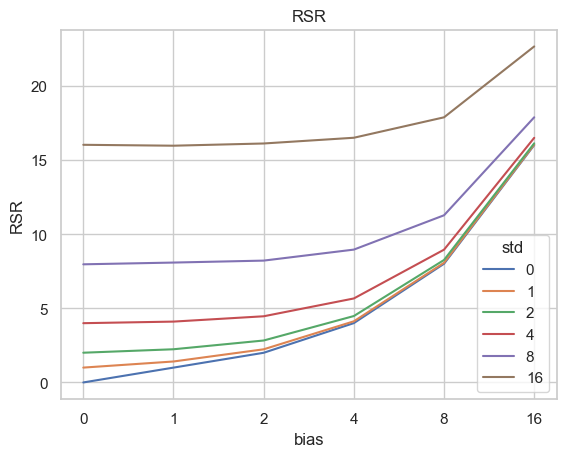

In [146]:
# plot 3x3 heatmap for each column
i = 1
for i in [1, 2, 3, 4, 5, 6, 7, 8,]:
    title = df_evl.columns[i]
    # line chart; hue: std, x: bias, y: value
    sns.set(style="whitegrid")
    sns.lineplot(x="bias", y=title, hue="std", 
                markers=True, markeredgewidth=5,
                data=df_evl)
    plt.title(title)
    plt.show()

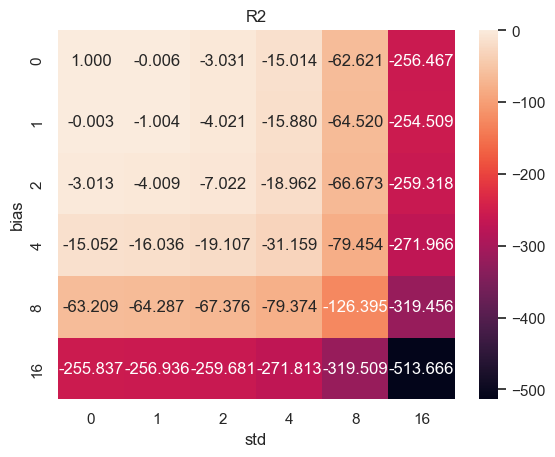

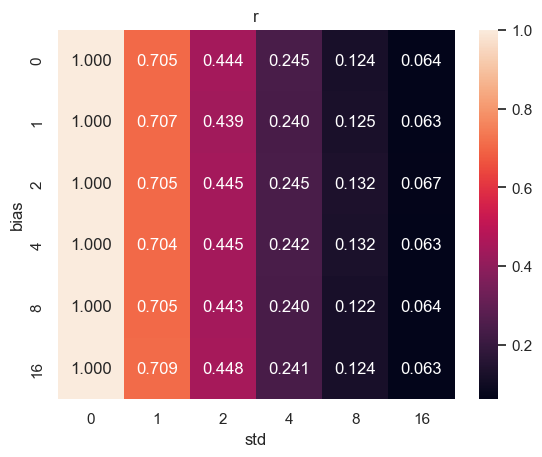

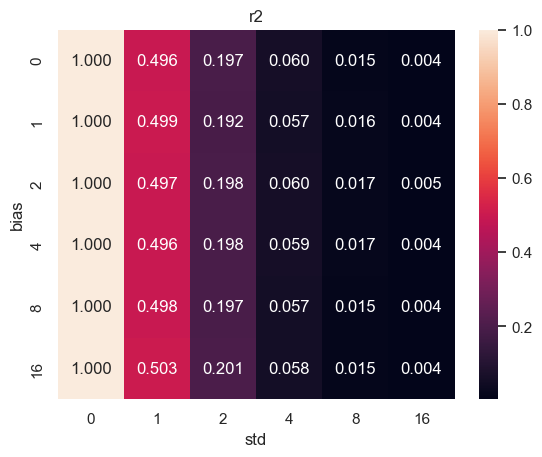

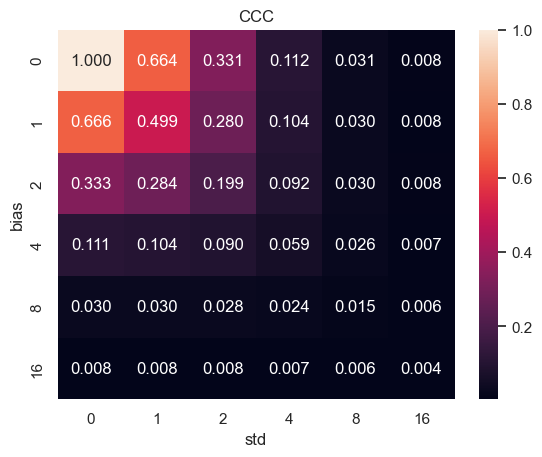

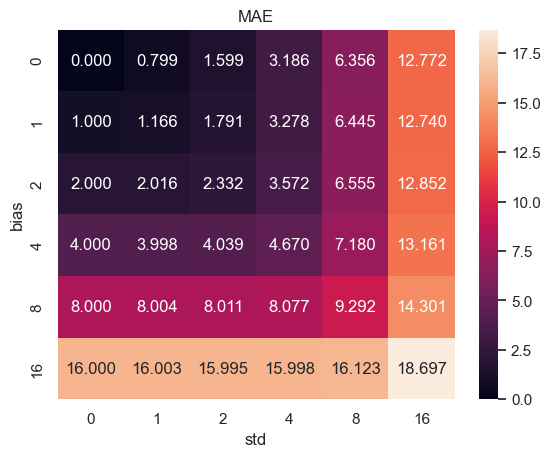

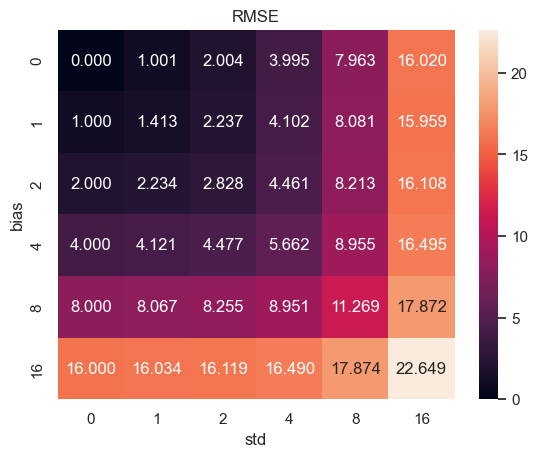

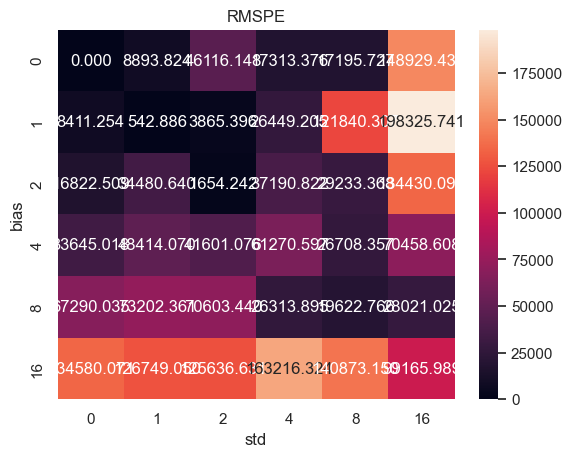

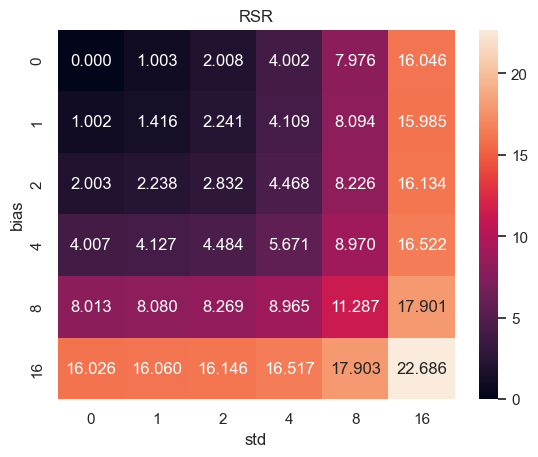

In [148]:
# plot 3x3 heatmap for each column
i = 1
for i in [1, 2, 3, 4, 5, 6, 7, 8,]:
    title = df_evl.columns[i]
    sns.heatmap(df_evl.iloc[:, i].values.reshape(n_subplots, n_subplots), annot=True, 
                fmt=".3f", xticklabels=STD, yticklabels=BIAS)
    plt.title(title)
    plt.xlabel("std")
    plt.ylabel("bias")
    plt.show()